In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [175]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

A = make_moons(1000, noise=0.3)
X,y = A[0], A[1]
xTrain,xTest = train_test_split(X, test_size=0.2)
yTrain,yTest = train_test_split(y, test_size=0.2)

In [176]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logReg = LogisticRegression(solver="liblinear", random_state=42)
forestClf = RandomForestClassifier(n_estimators=10, random_state=42)
svcClf = SVC(gamma="auto", random_state=42)
votingClf = VotingClassifier(estimators=[("lr", logReg),("fc", forestClf),("sc", svcClf)], voting="hard")

for clf in logReg, forestClf, svcClf, votingClf:
    clf.fit(xTrain,yTrain)
    yPred = clf.predict(xTest)
    print(clf.__class__.__name__, accuracy_score(yTest, yPred))

LogisticRegression 0.51
RandomForestClassifier 0.535
SVC 0.565
VotingClassifier 0.55


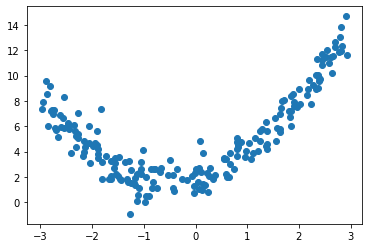

In [177]:
from sklearn.model_selection import train_test_split
m = 200
np.random.seed(42)
X = 6 * np.random.rand(m, 1) - 3
y = 1 * X**2 + X + 2 + np.random.randn(m,1)
y = y.ravel()
plt.scatter(X, y)

xTrain,xTest,yTrain,yTest = train_test_split(X,y,test_size=0.4)

In [178]:
# Gradient Boosting with Early Stopping
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

GBReg = GradientBoostingRegressor(learning_rate=0.1, warm_start=True, n_estimators=150, random_state=42)
minError = np.inf
GBReg.fit(xTrain,yTrain)
errors = []
for yPred in GBReg.staged_predict(xTest):
    errors = errors + [mean_squared_error(yTest,yPred)]
bestEstimator = np.argmin(errors) + 1
print(bestEstimator)

bestModel = GradientBoostingRegressor(learning_rate=0.1, n_estimators=33, random_state=42)
bestModel.fit(xTrain,yTrain)
yPred = bestModel.predict(xTest)
print(np.sqrt(mean_squared_error(yTest,yPred)))

33
1.0315986228311942
